In [2]:
import matplotlib.pyplot as plt
import cv2

In [3]:
# # Load image
# image_path = ".data/Resampling.jpg"
# image = cv2.imread(image_path)  # Read image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# # Display image
# plt.figure(figsize=(1, 6))
# plt.imshow(image)
# plt.axis("off")  # Hide axis
# plt.show()
pass

<img src="./data/Resampling.jpg" alt="Confusion Matrix" width="600" height="400">

## Bootstrap

Bootstrap is a resampling method used to estimate uncertainty in data analysis. 

#### Why we resample again and again? ####
It is because we want to see how much variations we get in the computed statistics of diffrent sample collections of the same population.  
  
#### The key idea of Bootstrap: ####  
  
1. We resample the original dataset with replacement to create a new dataset of the same size.  
2. Each bootstrap sample is treated as a new dataset drawn from the original population.  
3. This resampling process is repeated multiple times to compute statistics such as mean, standard deviation, and confidence intervals.  

#### Understanding Sampling with Replacement: ####  
  
1. Sampling with replacement means that when an observation is randomly selected, it is put back into the dataset before making the next selection.  
2. Since each selection is independent of previous selections, the same observation can appear multiple times in a bootstrap sample.   
3. We resample the original dataset with replacement to create a new dataset of the same size.  
4. Each bootstrap sample is treated as if it were a new dataset drawn from the original population.  
5. We repeat this resampling process multiple times to compute statistics (e.g. Mean, St-dev, CI).  
6. Hence the probability of each observation j to be selected as a sample from a population n is always: P(select j) = $\frac{1}{n}$.   
7. Thus the probability that the first bootstrap observation is not the jth observation is : P(not select j) = $1 - \frac{1}{n}$.  
  
For example 

If n = 100 than:  
P(select j) = $\frac{1}{100}$ = 0.01 = 1%  
P(not select j) = 1 - $\frac{1}{100} = 1 - 0.01 = 0.99$ or $99\%$  

## K-fold cross-validation.

k-Fold Cross-Validation is a resampling technique used to evaluate the performance of a model by partitioning the dataset into k subsets (folds) and training the model multiple times on different partitions.

#### Steps to implement k-Fold Cross Validation. ####
  
1. Split the Data into k Folds:  
   a. The datasets is randomly divided into k equal-sized subsets (folds).  
   b. Common choices for k are 5 or 10.  
2. Iterate through each fold:  
   a. The model is trained on k -1 folds.  
   b. The remaining 1 fold is used for testing.  
3. Repeat for k iterations:  
   a. Each fold is used as test set once during the iterations.  
   b. The process is used k times, with a different fold used as test set during each iteration.  
4. Computer performance Metrics:  
   a. After all k iterations, the average of the k validation scores is taken as the final model performance.  
5. Once all the iterations are done, we do one of the following:  
   a. Train the final model using all the available data and use these values as intercept and coefficients.  
   b. Use the best model from k-Fold iterations (with lowest errors).  
   c. Average the Coefficient from all k Models and use the average values as intercept and coefficients.   
  
#### Why use K Fold Cross Validation? ####
  
1. It is more reliable than using a single train-test split.  
2. Each instance is used for both training and testing.  
3. Provides a better estimates of model performance.   

The choice of k-Fold Cross-validation matters because it impacts model bias, variance and computational cost.  
    
1. A lower K (2-5, suitable for small datasets):  
   a. It usualy means high bias (Becase training data is less) and high variance.  
   b. It is computationally cheap.  
   c. Useful for small datasets.  
2. A moderate K (10-20):   
   a. Means lower bias and moderate variance.  
   b. It is Computationally expense.  
   c. It works well in most cases and yields best results.   
3. An extreme value of k (k = n LOOCV, Leave One Out Cross Validation).  
   a. It has minimal bias but high variance because n-1 observations are used for training in each iteration.  
   b. Not recomended for large dataset as it uses n numbers of iterations. 
   c. It is computationally very expensive and slow.  

Most common values for K are 5 or 10.

#### Advantages ####  
  
1. It provides more reliable performance estimates because it uses multiple train-test splits.  
2. Every data point is used for both training and validation.  
3. Averaging results from multiple folds provides a more stable and unbiased estimates of model performance.  
4. The model is trained and tested on multiple subsets, making it more generalized and less prone to overfitting.  
  
#### Disadvantages ####  
     
1. It is computationally costlier because of multiple runs.  
2. It is comparatively complex to implement.  
3. Cannot be used for timeseries data.  

The below code does the following:  
  
1. Starts by importing required packages:  
   a. numpy, pandas, LinearRegression, PolynomialFeatures, KFold and Pyplot.  
2. Generates a Simulated Dataset of X and Y:  
   a. X: 100 random values between -4 and 4, following a Uniform distribution.  
   b. Y is created using $X^2$ with added noise using standard deviation = 0.25, maintaining a Quadratic relationship between X and Y.  
3. Tets Polynomial regression model:  
   a. Fits models with polynomail degrees ranging from 1 to 10  
4. Use 20-fold Cross validation:  
   a. Splits the dataset into 20 folds and evalutes each polynomial model using k-Fold CV.  
5. Repeats K-Fold CV 10 Times for Stability:  
   a. Runs the entire cross-validation process 10 times to obtain a stable estimate of Mean Squared Error (MSE).  

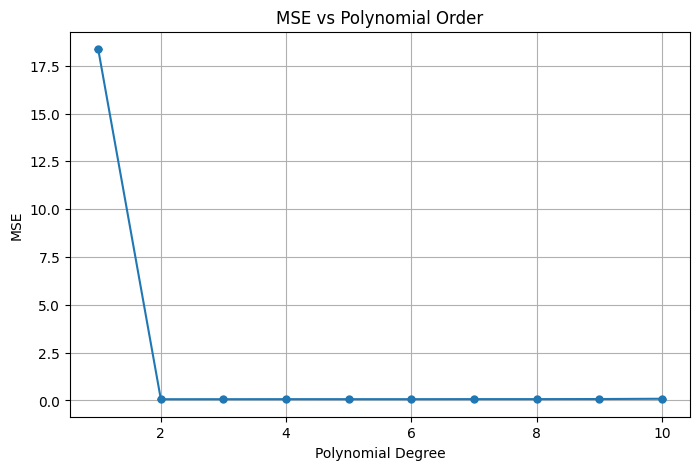

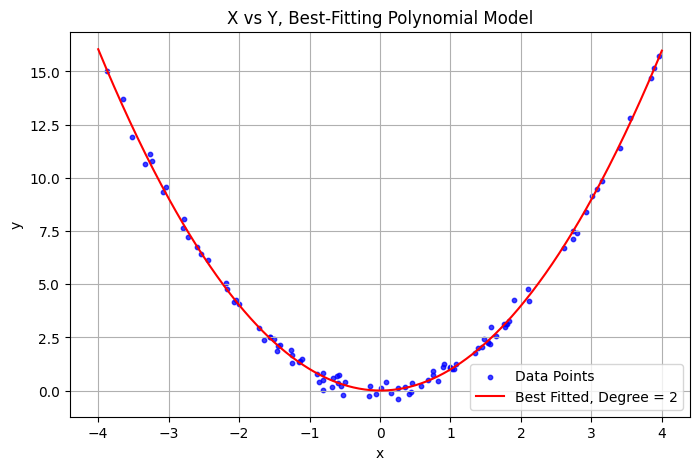

  - Optimal Polynomial Degree: 2
  - Lowest Mean Squared Error (MSE): 0.0653


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

# Constants
NUM_SAMPLES = 100                 # Number of data points
TRUE_POLY_ORDER = 2               # True polynomial order of the data
NUM_FOLDS = 10                    # Number of folds for cross-validation (Adjusted for better balance)
POLY_DEGREES = np.arange(1, 11)   # Range of polynomial degrees to test 1 to 10
NUM_REPLICATES = 20               # Increased replicates for more robust MSE estimates
RANDOM_SEED = 123                 # Random seed for reproducibility

# Set random seed
np.random.seed(RANDOM_SEED)

# Generate simulated dataset for X and Y
x_values = np.random.uniform(low=-4, high=4, size=NUM_SAMPLES)
y_values = np.random.normal(loc=x_values**TRUE_POLY_ORDER, scale=0.25, size=NUM_SAMPLES)
data = pd.DataFrame({'x': x_values, 'y': y_values})

def compute_cross_val_mse(data, degree=1, num_folds=5):
    """
    Computes cross-validation Mean Squared Error (MSE) for a given polynomial degree.
    
    Parameters:
    data (DataFrame): The dataset containing 'x' and 'y' values.
    degree (int): The polynomial degree to fit the model. Default to 1 = Linear
    num_folds (int): The number of folds for k-fold cross-validation. Default to 5 folds.
    
    Returns:
    float: The mean MSE computed across all folds.
    """
    
    # Initialize K-Fold cross-validation
    # Use a Random Seed to reproduce
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=RANDOM_SEED)
    fold_mse = []  # Declare an array to store MSE for each fold
    
    # Splits the dataset into num_folds i.e. 10 
    # For training and testing then return the indexes for each
    for train_idx, test_idx in kf.split(data):
        # print(train_idx, test_idx)
        # Split data into training and test sets
        x_train = data.iloc[train_idx]['x'].values.reshape(-1, 1)
        y_train = data.iloc[train_idx]['y']
        x_test = data.iloc[test_idx]['x'].values.reshape(-1, 1)
        y_test = data.iloc[test_idx]['y']
        
        # Transform features into polynomial form
        # Example: If degree=3 and x=[2], it expands to [1, 2, 4, 8]
        # - Column 1: Intercept (always 1)
        # - Column 2: Original feature (x)
        # - Column 3: Squared term (x^2)
        # - Column 4: Cubic term (x^3)
        # - Column n: Maximum polynomial degree expansion
        poly = PolynomialFeatures(degree=degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)

        #print(x_train)
        #print(x_train_poly)
        
        # Train a linear regression model on the polynomial-transformed data
        model = LinearRegression()
        model.fit(x_train_poly, y_train)
        
        # Predict on the test set
        y_pred = model.predict(x_test_poly)
        
        # Compute Mean Squared Error for this fold         
        fold_mse.append(np.mean((y_test - y_pred) ** 2))
    
    # Return the mean MSE across all folds
    return np.mean(fold_mse)

# Create a 2D array and initialize it with zeros to store MSE values for each replicate and polynomial degree
mse_results = np.zeros((NUM_REPLICATES, len(POLY_DEGREES)))

# Perform multiple replicates for stable MSE estimates
for replicate in range(NUM_REPLICATES):
    # Iterate over polynomial degrees to compute MSE for each degree
    for idx, degree in enumerate(POLY_DEGREES):
        # Compute MSE using k-fold cross-validation and store the result
        mse_results[replicate, idx] = compute_cross_val_mse(data, degree, NUM_FOLDS)

# Compute the mean and standard deviation of MSE estimates across replicates
mse_mean = mse_results.mean(axis=0)  # Mean MSE for each polynomial degree
mse_std = mse_results.std(axis=0)    # Standard deviation of MSE for each polynomial degree

# Identify optimal polynomial degree
# np.argmin returns the indices of the minimum value
optimal_degree = POLY_DEGREES[np.argmin(mse_mean)]

# Plot 1: MSE vs Polynomial Degree
plt.figure(figsize=(8, 5))
# Plot data points along the error bars to represent variability
plt.errorbar(POLY_DEGREES, mse_mean, yerr=mse_std, fmt='-o', capsize=3, markersize=5, label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('MSE vs Polynomial Order')
#plt.legend(loc='best')
plt.grid(True)
plt.show()

# Train final model with the optimal polynomial degree
poly = PolynomialFeatures(degree=optimal_degree)
x_poly = poly.fit_transform(data['x'].values.reshape(-1, 1))
final_model = LinearRegression()
final_model.fit(x_poly, data['y'])

# Generate predictions for visualization
x_plot = np.linspace(-4, 4, 500).reshape(-1, 1)
x_plot_poly = poly.transform(x_plot)
y_plot = final_model.predict(x_plot_poly)

# Plot 2: The optimal-fitting polynomial model
plt.figure(figsize=(8, 5))
plt.scatter(data['x'], data['y'], label='Data Points', s=10, color='blue', alpha=0.75,)
plt.plot(x_plot, y_plot, label=f'Best Fitted, Degree = {optimal_degree}', color='red', linewidth=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('X vs Y, Best-Fitting Polynomial Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"  - Optimal Polynomial Degree: {optimal_degree}")
print(f"  - Lowest Mean Squared Error (MSE): {mse_mean.min():.4f}")

## Bootstrap to obtain median and 95% CI (Confidence interval) for parameter estimates (slope and intercept) summarizing the relationship between `x` and `y_measured.`

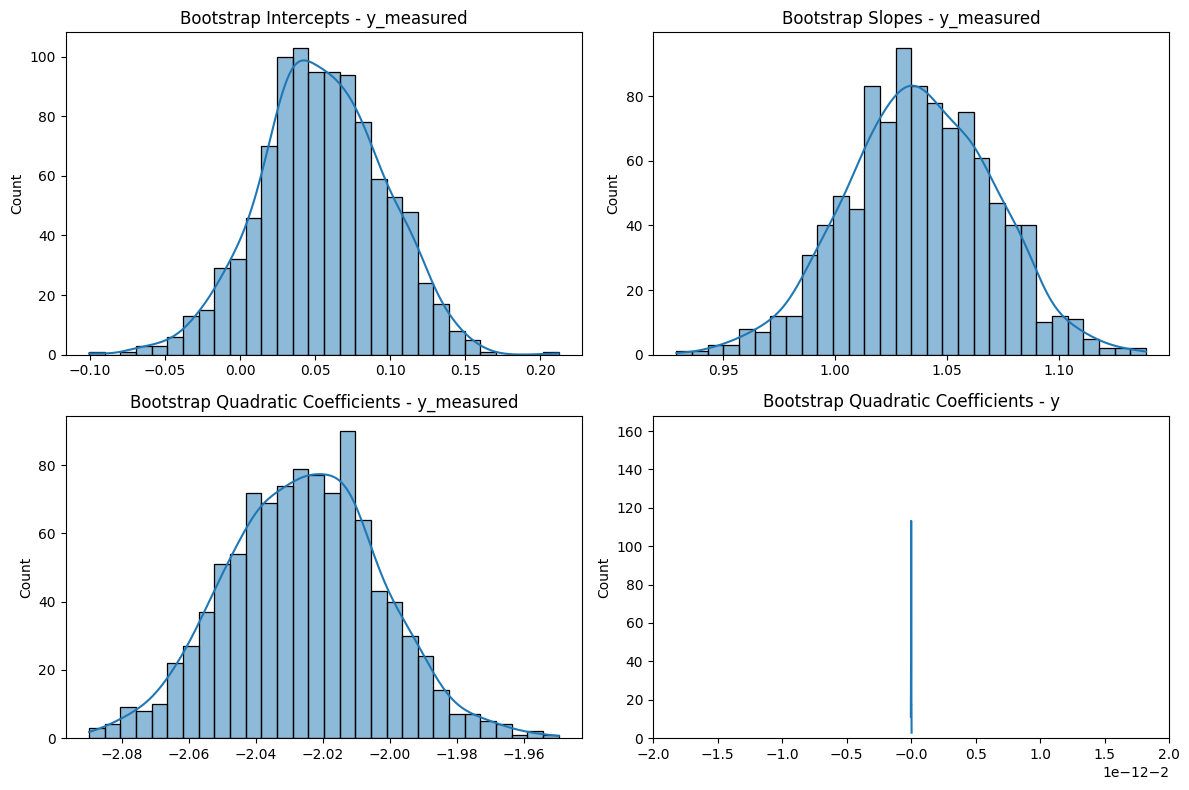

For Y-Measured:
   Parameter    Median  95% CI Lower  95% CI Upper
0  Intercept  0.053872     -0.028690      0.131754
1    Slope x  1.037632      0.971510      1.099855
2   Slope x² -2.025652     -2.070652     -1.980908
For Y:
   Parameter        Median  95% CI Lower  95% CI Upper
0  Intercept -8.881784e-16 -4.884981e-15  2.886580e-15
1    Slope x  1.000000e+00  1.000000e+00  1.000000e+00
2   Slope x² -2.000000e+00 -2.000000e+00 -2.000000e+00


In [5]:
import numpy as np
from numpy.random import default_rng
import pandas as pd

#import scipy.stats as stats
#import statsmodels.api as sm

from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

rng = default_rng(seed=1)
nobs = 1000
x = rng.normal(size=nobs)
y = x - 2 * x**2
y_measured = y + rng.normal(size=nobs)

def bootstrap_estimates(x, y, degree=1, n_iterations=1000):
    """
    Perform bootstrapped polynomial regression to estimate the parameters of the model.

    This function resamples the given dataset with replacement, fits a polynomial regression model
    of the specified degree, and returns bootstrapped estimates of the model coefficients.
    
    Parameters:
    x : array-like
        The independent variable values.
    y : array-like
        The dependent variable values.
    degree : int, optional (default=1)
        The degree of the polynomial regression.
    n_iterations : int, optional (default=1000)
        The number of bootstrap iterations to perform.
    
    Returns:
    np.array
        A NumPy array where each row represents bootstrap estimates of [intercept, slope_x, slope_x^2].
    """

    results = []
    
    for temp in range(n_iterations):
        # Resample with replacement
        x_resampled, y_resampled = resample(x, y)
        
        # Fit polynomial regression model
        poly = PolynomialFeatures(degree=degree)
        x_poly_fit = poly.fit_transform(x_resampled.reshape(-1, 1))
        lin_reg = LinearRegression(fit_intercept=True).fit(x_poly_fit, y_resampled)
        
        # Store coefficients
        intercept = lin_reg.intercept_
        slope_x = lin_reg.coef_[1]
        slope_x2 = lin_reg.coef_[2]
        results.append([intercept, slope_x, slope_x2])
    
    return np.array(results)

# Bootstrap for y_measured
degree = 2
bootstrap_results_measured = bootstrap_estimates(x, y_measured, degree)

# Calculate median and 95% confidence intervals
median_estimates_ymeasured = np.median(bootstrap_results_measured, axis=0)
ci_lower_ymeasured = np.percentile(bootstrap_results_measured, 2.5, axis=0)
ci_upper_ymeasured = np.percentile(bootstrap_results_measured, 97.5, axis=0)

# Bootstrap for y
bootstrap_results_y = bootstrap_estimates(x, y, degree)

# Calculate median and 95% confidence intervals
median_estimates_y = np.median(bootstrap_results_y, axis=0)
ci_lower_y = np.percentile(bootstrap_results_y, 2.5, axis=0)
ci_upper_y = np.percentile(bootstrap_results_y, 97.5, axis=0)

# Create DataFrame for y_measured
df_ymeasured = pd.DataFrame({
    "Parameter": ["Intercept", "Slope x", "Slope x²"],
    "Median": median_estimates_ymeasured,
    "95% CI Lower": ci_lower_ymeasured,
    "95% CI Upper": ci_upper_ymeasured
})

# Create DataFrame for y
df_y = pd.DataFrame({
    "Parameter": ["Intercept", "Slope x", "Slope x²"],
    "Median": median_estimates_y,
    "95% CI Lower": ci_lower_y,
    "95% CI Upper": ci_upper_y
})

# Optional Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(bootstrap_results_measured[:, 0], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Bootstrap Intercepts - y_measured")
sns.histplot(bootstrap_results_measured[:, 1], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Bootstrap Slopes - y_measured")
sns.histplot(bootstrap_results_measured[:, 2], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Bootstrap Quadratic Coefficients - y_measured")
sns.histplot(bootstrap_results_y[:, 2], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Bootstrap Quadratic Coefficients - y")
plt.tight_layout()
plt.show()

# Display results
print("For Y-Measured:")
print(df_ymeasured)

print("For Y:")
print(df_y)


| **Aspect**               | **Y-Measured (With Noise)**   | **Y (True Function)**        |
|--------------------------|-----------------------------|-----------------------------|
| **Intercept**           | Slightly biased by noise    | Exactly 0                   |
| **Slope x**             | Close to 1, small CI width  | Exactly 1                   |
| **Slope x²**            | Close to -2, wider CI       | Exactly -2                  |
| **Confidence Intervals** | Wider, showing uncertainty  | Zero-width, perfect estimates |
| **Effect of Bootstrapping** | Captures variability due to noise | Always returns exact values |

- For y, bootstrapping consistently recovers the true model parameters with zero variability in the estimates.
- For y_measured, noise introduces variability, widening the confidence intervals and slightly biasing the estimates.

## Lets predict the number of applications received using the other variables in the **College dataset.**.


**Importing Libraries:**

In [6]:
#IMPORT LIBRARIES

from sklearn import preprocessing

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

**Loading dataset:**

In [7]:
#READ AUTO.CSV DATASET
df_college = pd.read_csv("./data/data.csv")
df_college

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [8]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [9]:
df_college.describe().T

,count,mean,std,min,25%,50%,75%,max
apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
f_undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
p_undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
room_board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [10]:
# There are no null values
print(f"Any Nulls? = {df_college.isna().sum().sum() != 0}")
# Convert private to Binary values instead of object
print(df_college['private'].value_counts())

if df_college['private'].dtype == 'object':
    df_college['private'] = df_college['private'].map({'Yes': 1, 'No': 0})

print(df_college['private'].value_counts())

Any Nulls? = False
private
Yes    565
No     212
Name: count, dtype: int64
private
1    565
0    212
Name: count, dtype: int64


In [11]:
# We need to scale the data for consistency.T
# Perform Scalling using StandardScaler (Z-score)
df_college_scaled = preprocessing.scale(df_college)
df_college_scaled = pd.DataFrame(df_college_scaled, columns=df_college.columns)

print(df_college_scaled.head())

df_college_scaled.describe().T

    private      apps    accept    enroll  top10perc  top25perc  f_undergrad  \
0  0.612553 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1  0.612553 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2  0.612553 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3  0.612553 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4  0.612553 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   p_undergrad  outstate  room_board     books  personal       phd  terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   s_f_ratio  perc_alumni    expend  g

,count,mean,std,min,25%,50%,75%,max
private,777.0,-1.097363e-16,1.000644,-1.632512,-1.632512,0.612553,0.612553,0.612553
apps,777.0,3.657878e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
accept,777.0,5.486816e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
enroll,777.0,-5.486816e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
top10perc,777.0,-4.115112e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
top25perc,777.0,-1.554598e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
f_undergrad,777.0,1.828939e-17,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
p_undergrad,777.0,0.000000e+00,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
outstate,777.0,1.554598e-16,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
room_board,777.0,3.474984e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593


### Split the data set into a training set and a test set.

In [12]:
# Separate features (X) and target variable (y)
X = df_college_scaled.drop('apps', axis=1)  # Drop the target variable and keep the predictors
y = df_college_scaled['apps']               # Select Target variable

# Split the data into Train and Test sets. Using 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

### Fit a linear model using least squares on the training set, and report the test error obtained.


In [13]:
regression = LinearRegression().fit(X_train, y_train)
y_pred = regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_sq = r2_score(y_test, y_pred)

# Print the results
print(f"MSE (Mean Squared Error) For Test set = {mse:.4f}")
print(f"RMSE (Root Mean Squared Error) For Test set = {rmse:.4f}")
print(f"R^2 (R-squared) for Test set = {r_sq:.4f}")

MSE (Mean Squared Error) For Test set = 0.0470
RMSE (Root Mean Squared Error) For Test set = 0.2167
R^2 (R-squared) for Test set = 0.9460


In [14]:
def plot_actual_vs_pred(y_test, y_pred, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.6, color="green")
    plt.axhline(y=0, color='red', linestyle="--")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(title)
    plt.grid(True)
    plt.show()

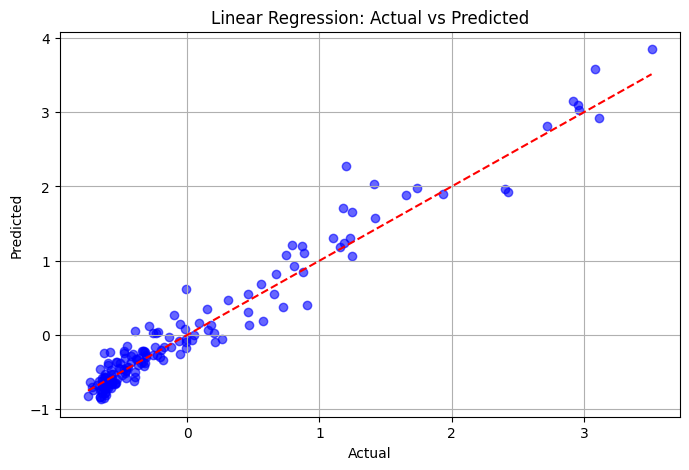

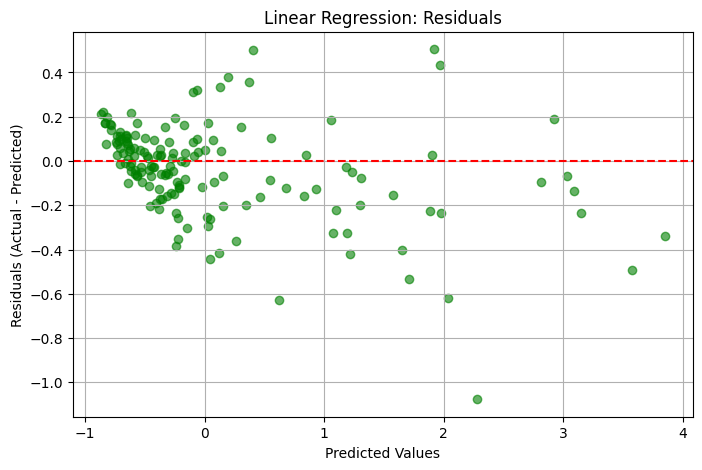

In [15]:
# Plot for Linear Regression
plot_actual_vs_pred(y_test, y_pred, "Linear Regression: Actual vs Predicted")
plot_residuals(y_test, y_pred, "Linear Regression: Residuals")

### Lets fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation and report the test error obtained.

In [16]:
# Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=np.logspace(-4, 4, 50), cv=10, scoring='neg_mean_squared_error')

ridge_cv = ridge_cv.fit(X_train, y_train)

chosen_lambda = ridge_cv.alpha_
print(f"Choosen lambda value: {chosen_lambda}")

ridge_reg = Ridge(alpha = chosen_lambda).fit(X_train,y_train)

# Predict y
y_pred_ridge = ridge_reg.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r_sq = r2_score(y_test, y_pred_ridge)

# Print the results
print(f"MSE (Mean Squared Error) For Test set = {ridge_mse:.4f}")
print(f"RMSE (Root Mean Squared Error) For Test set = {ridge_rmse:.4f}")
print(f"R^2 (R-squared) for Test set = {ridge_r_sq:.4f}")

Choosen lambda value: 0.0001
MSE (Mean Squared Error) For Test set = 0.0470
RMSE (Root Mean Squared Error) For Test set = 0.2167
R^2 (R-squared) for Test set = 0.9460


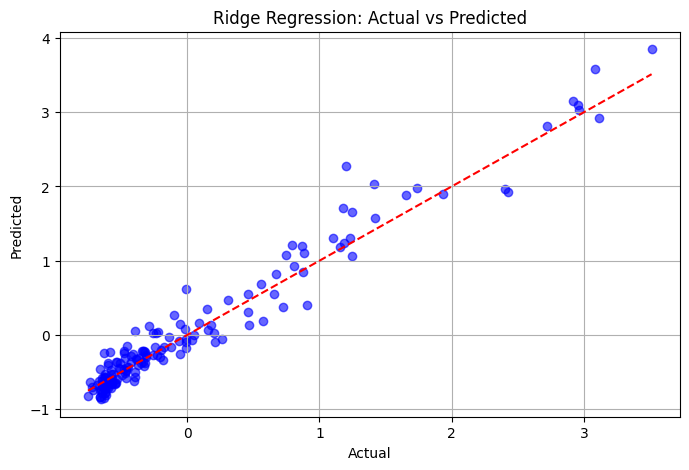

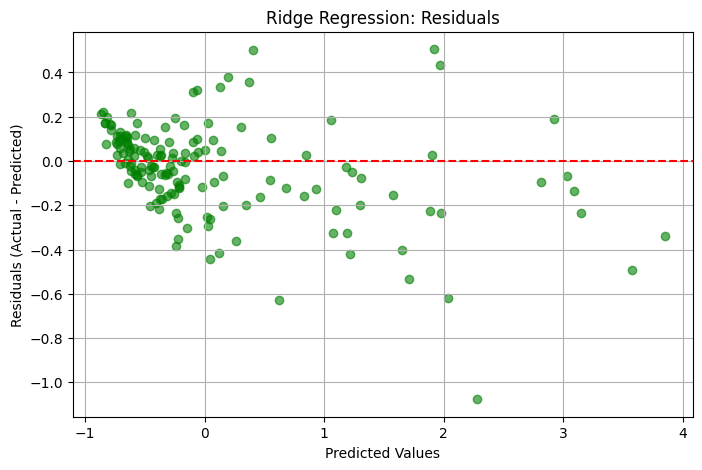

In [17]:
# Plot for Ridge Regression
plot_actual_vs_pred(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted")
plot_residuals(y_test, y_pred_ridge, "Ridge Regression: Residuals")

### Now lets fit a lasso model on the training set, with $\lambda$ chosen by cross-validation and report the test error obtained, along with the number of non-zero coefficient estimates.

In [18]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4,4,50), cv=10)
lasso_cv_model = lasso_cv_model.fit(X_train, y_train)

choosen_lambda =lasso_cv_model.alpha_
print(f"Choosen lambda value: {choosen_lambda}")

# Now we use the choosen lambda for training the model
lasso_cv_model = Lasso(alpha=choosen_lambda).fit(X_train, y_train)

# Predict y
y_pred_lasso = lasso_cv_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r_sq = r2_score(y_test, y_pred_lasso)

coef = lasso_cv_model.coef_
non_zero_coef_values = coef[coef != 0]
feature_names = X_train.columns
non_zero_features = feature_names[coef != 0]
non_zero_coeffs = len(non_zero_coef_values)

coeff_df= pd.DataFrame({'Feature_Name': non_zero_features,'Coefficient_Value':non_zero_coef_values})


# Print the results
print(f"MSE (Mean Squared Error) For Test set = {lasso_mse:.4f}")
print(f"RMSE (Root Mean Squared Error) For Test set = {lasso_rmse:.4f}")
print(f"R^2 (R-squared) for Test set = {lasso_r_sq:.4f}")
print(f"Number of non-zero coefficients = {non_zero_coeffs}")

Choosen lambda value: 0.004291934260128779
MSE (Mean Squared Error) For Test set = 0.0454
RMSE (Root Mean Squared Error) For Test set = 0.2131
R^2 (R-squared) for Test set = 0.9478
Number of non-zero coefficients = 16


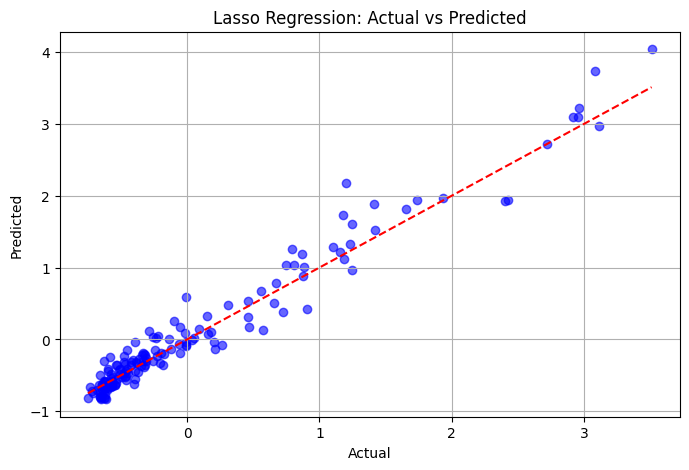

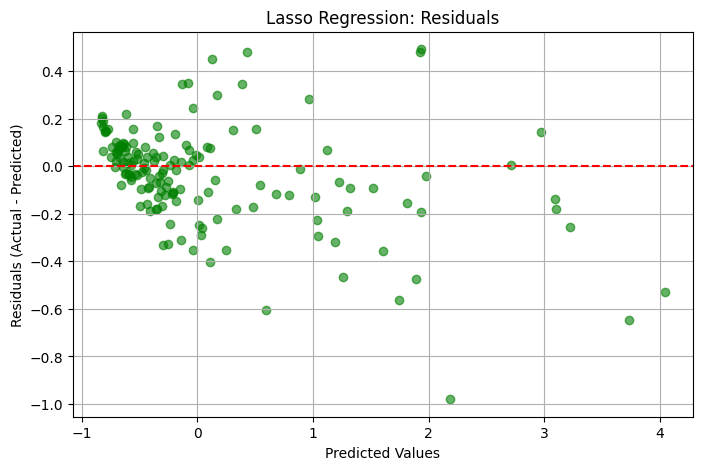

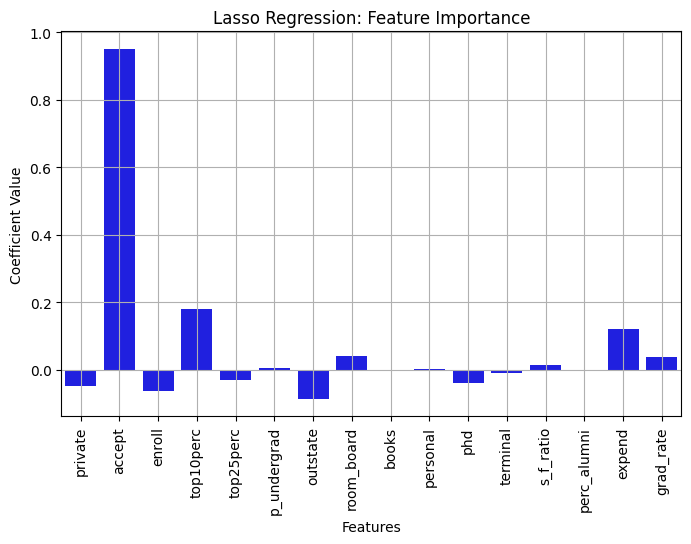

In [19]:
# Plot for Lasso Regression
plot_actual_vs_pred(y_test, y_pred_lasso, "Lasso Regression: Actual vs Predicted")
plot_residuals(y_test, y_pred_lasso, "Lasso Regression: Residuals")

plt.figure(figsize=(8, 5))
sns.barplot(x=non_zero_features, y=non_zero_coef_values, color="blue")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression: Feature Importance")
plt.grid(True)
plt.show()